In [ ]:
# Question 3

In [111]:
import pandas as pd
import numpy as np
# excess return dataframe
excess_ret_df_org = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name = 'excess returns')
excess_ret_df = excess_ret_df_org.drop('Date', axis = 1)
target_ret = 0.01

In [22]:
# mean excess return
mean_excess_ret = excess_ret_df.mean(axis = 0)

In [75]:
# equally-weighted
weight_EW = [target_ret / sum(mean_excess_ret)] * len(mean_excess_ret)
weight_EW = pd.Series(weight_EW, index = mean_excess_ret.index)

In [34]:
# risk-parity
var_excess_ret = excess_ret_df.var(axis = 0, ddof = 1) # estimated variance of excess return
weight_RP =  (1 / var_excess_ret) * (target_ret / sum(mean_excess_ret / var_excess_ret))
weight_RP = pd.Series(weight_RP, index = var_excess_ret.index)

In [125]:
# regularized
covariance = excess_ret_df.cov() # original covariance matrix
covariance_hat = excess_ret_df.cov()
security_num = len(mean_excess_ret)

# derive regularized covariance
for i in range(0, security_num):
    for j in range(0, security_num):
        if i != j:
            covariance_hat.iloc[i, j] /= 2  
            
# regularized-weight            
weight_RG = pd.Series(np.linalg.inv(covariance_hat.to_numpy()) @ mean_excess_ret.to_numpy(), 
                      index = covariance_hat.index)
weight_RG = weight_RG * (target_ret / sum(mean_excess_ret * weight_RG))

In [112]:
# original return dataframe
ret_df = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name = 'total returns')
ret_df.set_index('Date', inplace = True)

# risk-free rate
risk_free = ret_df['SHV']
excess_ret_df_org.set_index("Date", inplace = True)

In [128]:
# calculate the performance for each weight
performance = {}
weights = [weight_EW, weight_RP, weight_RG]
ret_name = ['ret_EW', 'ret_RP', 'ret_RG']

i = 0
while i < 3:
    performance[ret_name[i]] = excess_ret_df_org.dot(weights[i]) + risk_free
    i += 1

performance_df = pd.DataFrame(data = performance)

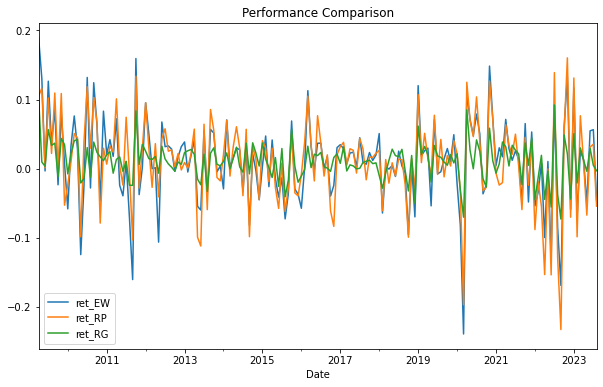

In [139]:
# Compare different portfolio's performance
plot = performance_df.plot(title = "Performance Comparison", figsize=(10, 6))

In [130]:
# Mean of each weight's return 
performance_df.mean() * 12

ret_EW    0.010589
ret_RP    0.010589
ret_RG    0.010589
dtype: float64

In [133]:
# Volatility of each weight's return 
performance_df.std() * (12 ** (1/2))

ret_EW    0.061490
ret_RP    0.062828
ret_RG    0.027063
dtype: float64

In [134]:
# Sharpe ratio of each weight's return 
(performance_df.mean() - risk_free.mean()) * 12 / performance_df.std() * (12 ** (1/2))

ret_EW    0.181795
ret_RP    0.177921
ret_RG    0.413060
dtype: float64